In [1]:
from tensorflow.keras.datasets import mnist
(train_input,train_target),(test_input,test_target) = mnist.load_data()

In [2]:
test_input.shape

(10000, 28, 28)

In [3]:
test_target.shape

(10000,)

In [4]:
# 문제: 다항 분류
# 활성화 함수: softmax
# 손실함수: categorical_crossentropy

In [5]:
# 전처리
from tensorflow.keras.utils import to_categorical

train_target = to_categorical(train_target)

In [20]:
from sklearn.preprocessing import StandardScaler

train_input = train_input.reshape((-1,28,28,1)) / 255.0

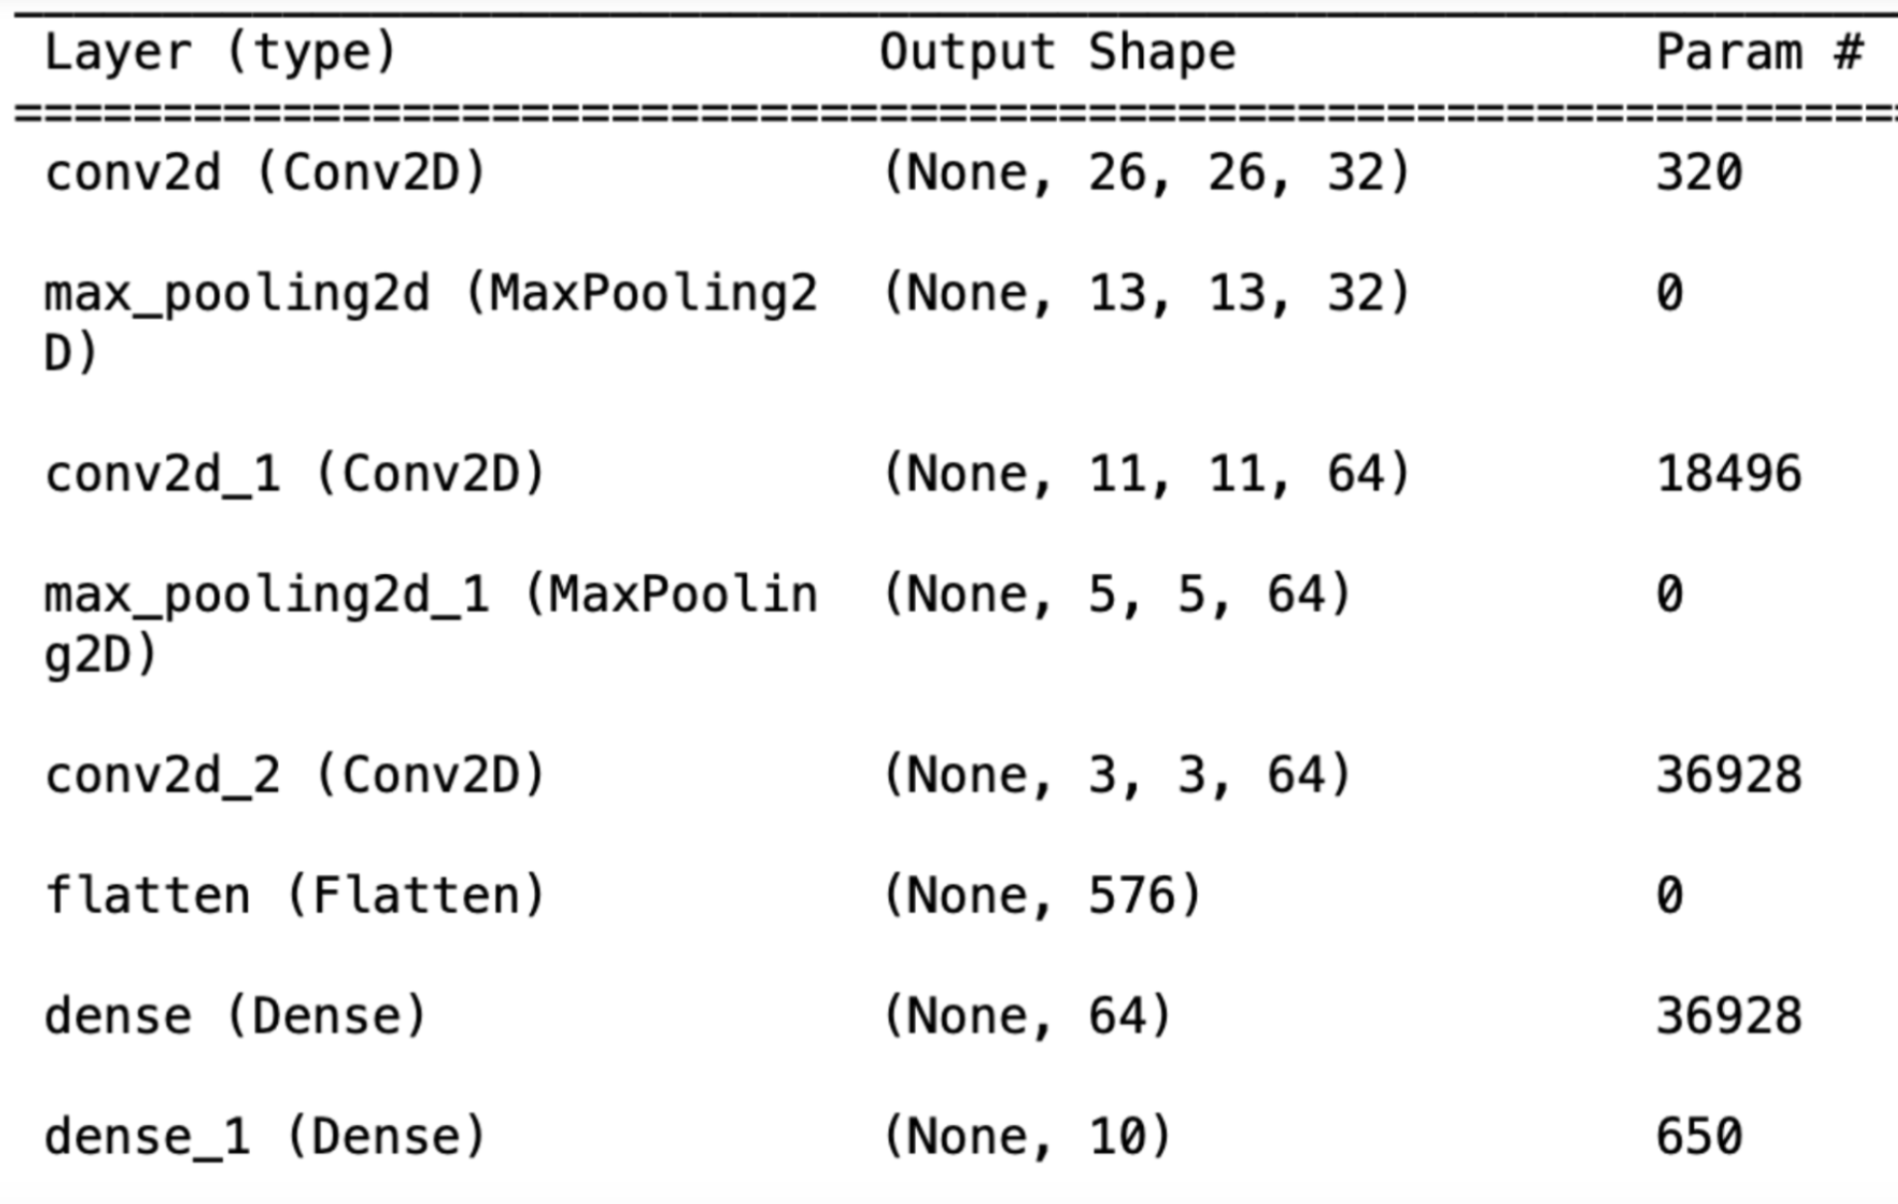

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=((28,28,1))))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [21]:
model.fit(train_input,train_target,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0471 - accuracy: 0.9881
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0482 - accuracy: 0.9895
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0618 - accuracy: 0.9898
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0641 - accuracy: 0.9908
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1092 - accuracy: 0.9891
